<a href="https://colab.research.google.com/github/malickdiattara243-lang/MalickDiattara/blob/main/Projet_ia1_finall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pipeline complet de préparation de données
## Détection de fraude par carte bancaire

**Cours** : 030534 IFM – Initiation à l'intelligence artificielle  
**Professeure** : Nadjate Saïdani  
**Session** : Hiver 2025

---

**Objectif** : Maîtriser l'ensemble du processus de préparation de données pour le Machine Learning, depuis la compréhension initiale du problème jusqu'à la livraison d'un jeu de données propre, transformé, équilibré et prêt pour un modèle.

**Jeu de données** : Credit Card Fraud Detection (Kaggle)  
~284 000 transactions, 31 colonnes, fortement déséquilibré.

# 4.1 Analyse initiale du problème

## Contexte

La détection de fraude bancaire est un problème classique en apprentissage automatique. Les institutions financières doivent identifier les transactions frauduleuses parmi des millions de transactions légitimes, en temps réel.

Le jeu de données utilisé provient de transactions réelles effectuées par des clients européens en septembre 2013. Les variables V1 à V28 sont le résultat d'une transformation par Analyse en Composantes Principales (ACP/PCA) pour des raisons de confidentialité. Seules les variables `Time` et `Amount` sont restées dans leur forme originale.

## Type de tâche

Il s'agit d'un problème de **classification binaire supervisée** :
- **Classe 0** : transaction légitime
- **Classe 1** : transaction frauduleuse

La particularité de ce problème est le **déséquilibre extrême** des classes : les fraudes ne représentent qu'environ 0,17 % de l'ensemble des transactions.

# 4.2 Exploration et diagnostic des données

## Importation des bibliothèques et chargement des données

In [ ]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Configuration de l'affichage
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')
pd.set_option('display.max_columns', 35)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Chargement du jeu de données
# Note : le fichier creditcard.csv doit être dans le même dossier que ce notebook
df =  pd.read_csv(r"C:\Users\Anonymous - Anonyme\Downloads\creditcard.csv")
print(f"Jeu de données chargé avec succès : {df.shape[0]} lignes, {df.shape[1]} colonnes")

Jeu de données chargé avec succès : 284807 lignes, 31 colonnes


## Aperçu et structure des données

In [ ]:
# Aperçu des premières lignes
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Dimensions du jeu de données
print(f"Nombre de lignes   : {df.shape[0]}")
print(f"Nombre de colonnes : {df.shape[1]}")
print(f"\nColonnes présentes :")
print(list(df.columns))

Nombre de lignes   : 284807
Nombre de colonnes : 31

Colonnes présentes :
['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [ ]:
# Types de données et informations générales
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# Statistiques descriptives
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Vérification des valeurs manquantes

In [ ]:
# Vérification des valeurs manquantes par colonne
valeurs_manquantes = df.isnull().sum()
total_manquantes = valeurs_manquantes.sum()

print(f"Total de valeurs manquantes dans le dataset : {total_manquantes}")

if total_manquantes == 0:
    print("→ Le jeu de données est complet, aucune imputation nécessaire.")
else:
    print("\nDétail par colonne :")
    print(valeurs_manquantes[valeurs_manquantes > 0])

Total de valeurs manquantes dans le dataset : 0
→ Le jeu de données est complet, aucune imputation nécessaire.


## Analyse de la distribution de la variable Amount

Asymétrie (Skewness) de Amount : 16.98
→ Un skewness > 1 indique une forte asymétrie positive.
→ Ici, 16.98 confirme une distribution très déformée vers la droite.


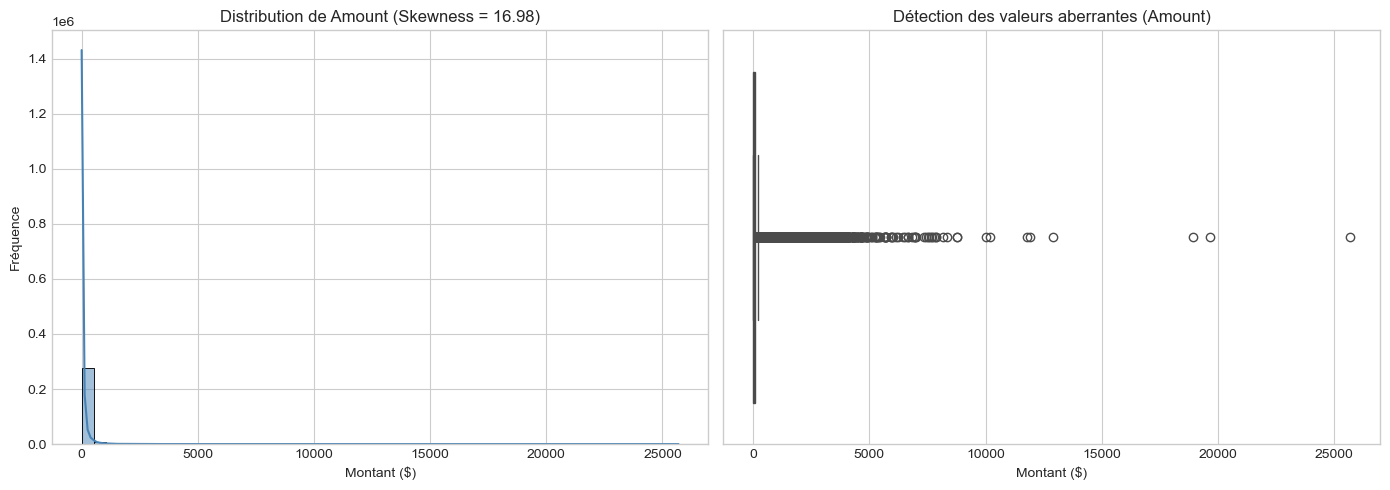


Montant moyen    : 88.35 $
Montant médian   : 22.00 $
Montant maximal  : 25691.16 $
→ L'écart entre la moyenne et la médiane confirme l'influence des valeurs extrêmes.


In [ ]:
# Calcul de l'asymétrie (skewness) de Amount
skew_amount = df['Amount'].skew()
print(f"Asymétrie (Skewness) de Amount : {skew_amount:.2f}")
print(f"→ Un skewness > 1 indique une forte asymétrie positive.")
print(f"→ Ici, {skew_amount:.2f} confirme une distribution très déformée vers la droite.")

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogramme
sns.histplot(df['Amount'], bins=50, kde=True, ax=axes[0], color='steelblue')
axes[0].set_title(f"Distribution de Amount (Skewness = {skew_amount:.2f})")
axes[0].set_xlabel("Montant ($)")
axes[0].set_ylabel("Fréquence")

# Boîte à moustaches pour les valeurs aberrantes
sns.boxplot(x=df['Amount'], ax=axes[1], color='steelblue')
axes[1].set_title("Détection des valeurs aberrantes (Amount)")
axes[1].set_xlabel("Montant ($)")

plt.tight_layout()
plt.show()

# Statistiques complémentaires
print(f"\nMontant moyen    : {df['Amount'].mean():.2f} $")
print(f"Montant médian   : {df['Amount'].median():.2f} $")
print(f"Montant maximal  : {df['Amount'].max():.2f} $")
print(f"→ L'écart entre la moyenne et la médiane confirme l'influence des valeurs extrêmes.")

## Analyse de la variable Time

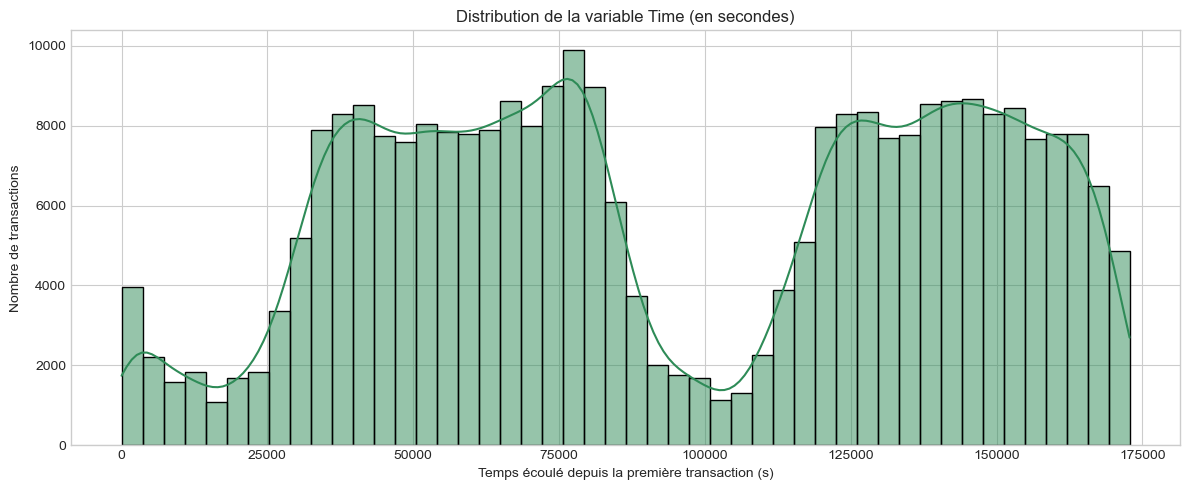

Durée totale couverte : 48.0 heures (~2 jours)
→ On observe deux cycles jour/nuit, ce qui suggère une périodicité dans les transactions.


In [ ]:
# Analyse de la distribution temporelle
fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(df['Time'], bins=48, kde=True, color='seagreen', ax=ax)
ax.set_title("Distribution de la variable Time (en secondes)")
ax.set_xlabel("Temps écoulé depuis la première transaction (s)")
ax.set_ylabel("Nombre de transactions")
plt.tight_layout()
plt.show()

print(f"Durée totale couverte : {df['Time'].max() / 3600:.1f} heures (~2 jours)")
print("→ On observe deux cycles jour/nuit, ce qui suggère une périodicité dans les transactions.")

## Visualisation du déséquilibre de classes

Transactions légitimes (classe 0) : 284,315 (99.83 %)
Transactions frauduleuses (classe 1) : 492 (0.173 %)

Ratio : 1 fraude pour 577 transactions légitimes


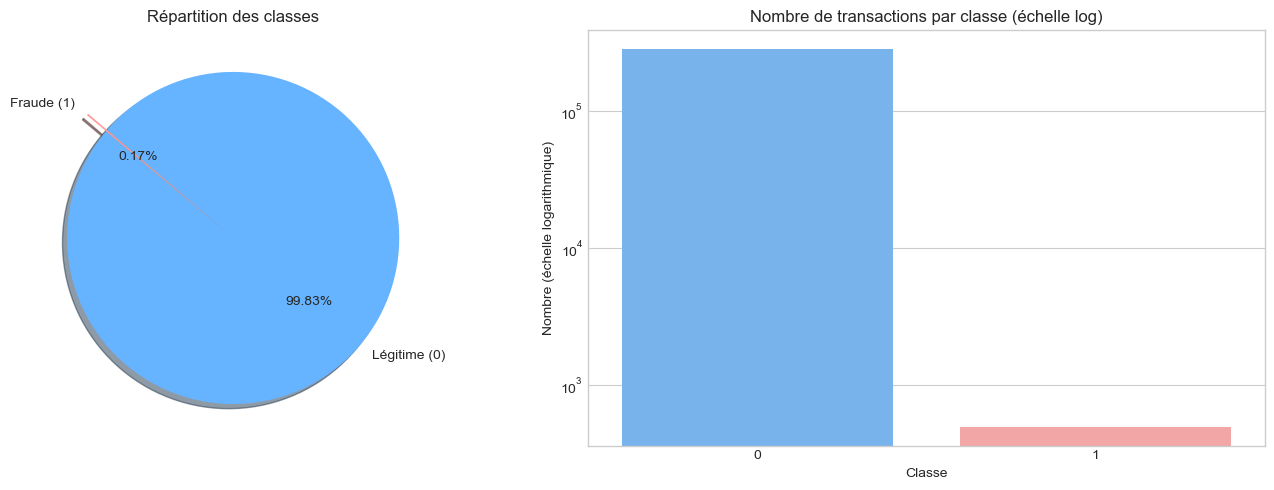

In [ ]:
# Répartition des classes
classes, counts = np.unique(df['Class'], return_counts=True)
pourcentage_fraude = counts[1] / counts.sum() * 100

print(f"Transactions légitimes (classe 0) : {counts[0]:,} ({100 - pourcentage_fraude:.2f} %)")
print(f"Transactions frauduleuses (classe 1) : {counts[1]:,} ({pourcentage_fraude:.3f} %)")
print(f"\nRatio : 1 fraude pour {counts[0] // counts[1]} transactions légitimes")

# Visualisation avec deux graphiques
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Diagramme circulaire
axes[0].pie(counts,
            labels=['Légitime (0)', 'Fraude (1)'],
            autopct='%.2f%%',
            startangle=140,
            colors=['#66b3ff', '#ff9999'],
            explode=(0, 0.15),
            shadow=True)
axes[0].set_title("Répartition des classes")

# Diagramme en barres (échelle log)
sns.countplot(x='Class', data=df, ax=axes[1], palette=['#66b3ff', '#ff9999'])
axes[1].set_yscale('log')
axes[1].set_title("Nombre de transactions par classe (échelle log)")
axes[1].set_xlabel("Classe")
axes[1].set_ylabel("Nombre (échelle logarithmique)")

plt.tight_layout()
plt.show()

## Matrice de corrélation

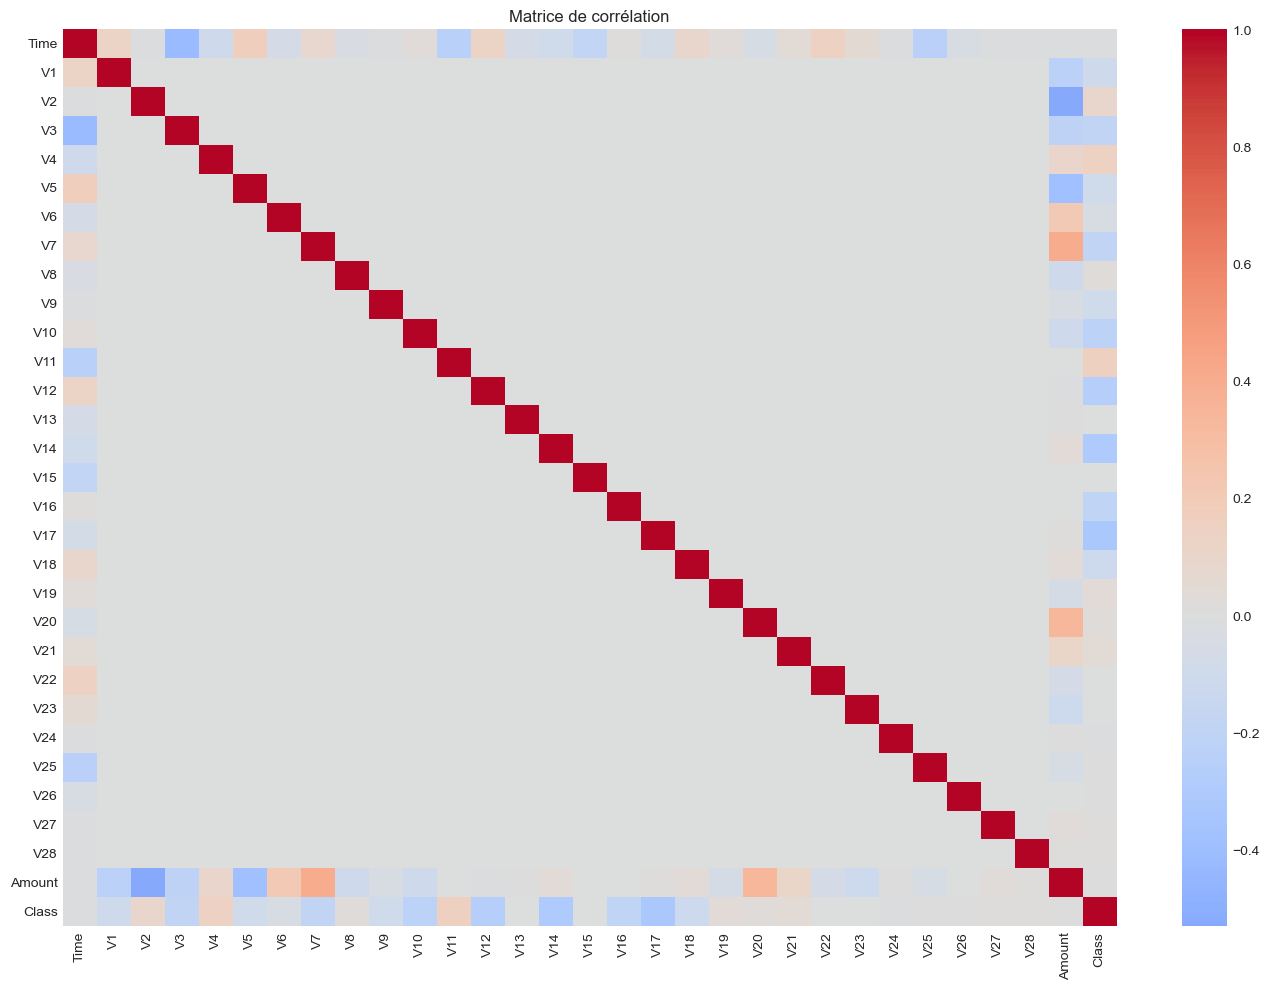

Top 10 des variables les plus corrélées avec la fraude (en valeur absolue) :
V17    0.326481
V14    0.302544
V12    0.260593
V10    0.216883
V16    0.196539
V3     0.192961
V7     0.187257
V11    0.154876
V4     0.133447
V18    0.111485


In [ ]:
# Matrice de corrélation
plt.figure(figsize=(14, 10))
correlation = df.corr()
sns.heatmap(correlation, cmap='coolwarm', center=0, annot=False, fmt='.1f')
plt.title("Matrice de corrélation")
plt.tight_layout()
plt.show()

# Variables les plus corrélées avec la classe cible
corr_avec_classe = correlation['Class'].drop('Class').abs().sort_values(ascending=False)
print("Top 10 des variables les plus corrélées avec la fraude (en valeur absolue) :")
print(corr_avec_classe.head(10).to_string())

## Synthèse de l'exploration

**Constats principaux :**

1. **Aucune valeur manquante** : le jeu de données est complet.
2. **Asymétrie forte de Amount** : skewness ~16.98, distribution très concentrée sur les faibles montants avec des valeurs extrêmes atteignant 25 000 $. → Transformation logarithmique nécessaire.
3. **Variable Time en secondes brutes** : couvre environ 48 heures avec une périodicité jour/nuit visible. → Transformation temporelle nécessaire pour extraire l'information cyclique.
4. **Déséquilibre extrême** : seulement ~0,17 % de fraudes. Un modèle naïf qui prédirait toujours "légitime" obtiendrait 99,83 % de précision mais serait totalement inutile. → Techniques de rééquilibrage indispensables.
5. **Variables V1-V28** : issues d'une PCA, donc déjà centrées et réduites. Amount et Time ne sont pas sur la même échelle. → Standardisation nécessaire.

# 4.3 Préparation et transformations des variables

Nous appliquons deux transformations justifiées par les constats de l'exploration :

1. **Transformation logarithmique** sur `Amount` : pour réduire l'asymétrie positive (skewness de ~16.98) et limiter l'influence des valeurs extrêmes. Réf. : Cours 3, transformation logarithmique `x' = log(x + c)`.

2. **Transformation temporelle** sur `Time` : conversion des secondes brutes en heures de la journée (0-23). Le temps en secondes cumulées n'a pas de signification directe pour un modèle ; l'heure de la journée capture le comportement cyclique jour/nuit. Réf. : Cours 3, transformations temporelles.

## Transformation 1 : Logarithmique sur Amount

Skewness AVANT transformation : 16.98
Skewness APRÈS transformation : 0.16
→ Réduction de l'asymétrie de 16.98 à 0.16


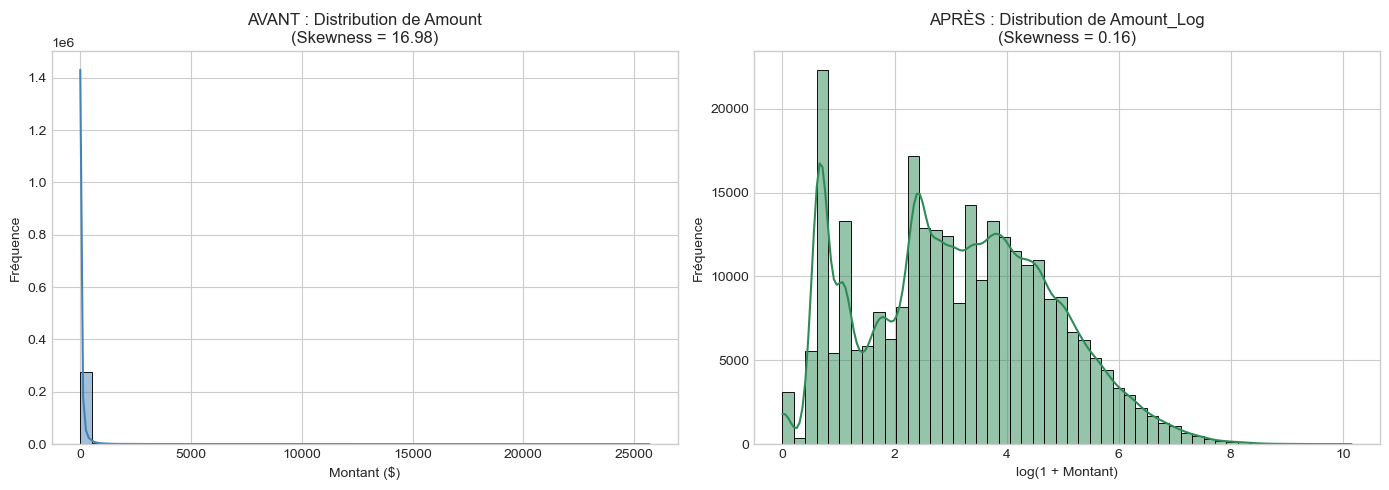

In [ ]:
# Sauvegarde des valeurs originales pour comparaison
amount_original = df['Amount'].copy()
time_original = df['Time'].copy()

# Transformation logarithmique : log1p(x) = log(1 + x)
# On utilise log1p au lieu de log pour gérer les montants de 0 $
df['Amount_Log'] = np.log1p(df['Amount'])

# Comparaison avant / après
skew_avant = skew(amount_original)
skew_apres = skew(df['Amount_Log'])

print(f"Skewness AVANT transformation : {skew_avant:.2f}")
print(f"Skewness APRÈS transformation : {skew_apres:.2f}")
print(f"→ Réduction de l'asymétrie de {skew_avant:.2f} à {skew_apres:.2f}")

# Visualisation avant / après
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(amount_original, bins=50, kde=True, ax=axes[0], color='steelblue')
axes[0].set_title(f"AVANT : Distribution de Amount\n(Skewness = {skew_avant:.2f})")
axes[0].set_xlabel("Montant ($)")
axes[0].set_ylabel("Fréquence")

sns.histplot(df['Amount_Log'], bins=50, kde=True, ax=axes[1], color='seagreen')
axes[1].set_title(f"APRÈS : Distribution de Amount_Log\n(Skewness = {skew_apres:.2f})")
axes[1].set_xlabel("log(1 + Montant)")
axes[1].set_ylabel("Fréquence")

plt.tight_layout()
plt.show()

**Justification** : La transformation logarithmique a réduit le skewness de ~16.98 à une valeur proche de 0. La distribution est maintenant beaucoup plus symétrique, ce qui est bénéfique pour les algorithmes sensibles à l'échelle des données (régression logistique, SVM, KNN). Les valeurs extrêmes ont été compressées sans perte d'information.

## Transformation 2 : Temporelle sur Time

Conversion de Time (secondes) → Heure de la journée (0-23)

Distribution des transactions par heure :
Heure
0.0      7695
1.0      4220
2.0      3328
3.0      3492
4.0      2209
5.0      2990
6.0      4101
7.0      7243
8.0     10276
9.0     15838
10.0    16598
11.0    16856
12.0    15420
13.0    15365
14.0    16570
15.0    16461
16.0    16453
17.0    16166
18.0    17039
19.0    15649
20.0    16756
21.0    17703
22.0    15441
23.0    10938


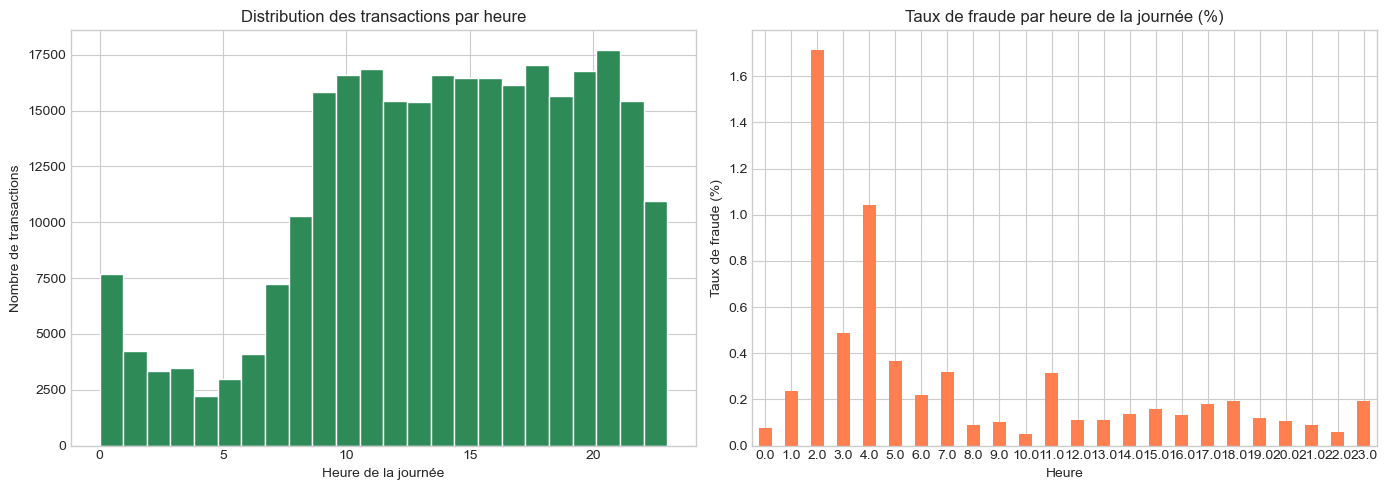


Heure avec le plus haut taux de fraude : 2h (1.71 %)


In [ ]:
# Conversion de Time (secondes cumulées) en heure de la journée (0-23)
df['Heure'] = (df['Time'] // 3600) % 24

print("Conversion de Time (secondes) → Heure de la journée (0-23)")
print(f"\nDistribution des transactions par heure :")
print(df['Heure'].value_counts().sort_index().to_string())

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribution des transactions par heure
df['Heure'].plot(kind='hist', bins=24, ax=axes[0], color='seagreen', edgecolor='white')
axes[0].set_title("Distribution des transactions par heure")
axes[0].set_xlabel("Heure de la journée")
axes[0].set_ylabel("Nombre de transactions")

# Taux de fraude par heure
fraude_par_heure = df.groupby('Heure')['Class'].mean() * 100
fraude_par_heure.plot(kind='bar', ax=axes[1], color='coral')
axes[1].set_title("Taux de fraude par heure de la journée (%)")
axes[1].set_xlabel("Heure")
axes[1].set_ylabel("Taux de fraude (%)")
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

print(f"\nHeure avec le plus haut taux de fraude : {fraude_par_heure.idxmax():.0f}h ({fraude_par_heure.max():.2f} %)")

**Justification** : La variable `Time` contient les secondes écoulées depuis la première transaction du dataset, sur une période de ~48 heures. En secondes brutes, cette variable n'est pas exploitable par un modèle. La conversion en cycle de 24h via `(Time // 3600) % 24` capture le pattern périodique d'activité (heures de forte/faible activité).

**Note importante** : L'heure absolue de la première transaction n'est pas connue dans ce dataset. Par conséquent, `Heure = 0` ne correspond pas nécessairement à minuit, mais à l'heure relative de la première transaction. Ce qui est pertinent ici, c'est le **pattern cyclique** (les creux et pics d'activité se répètent sur 24h), pas l'heure exacte sur l'horloge.

## Mise à l'échelle (Standardisation)

In [ ]:
# Les variables V1-V28 sont déjà standardisées (issues d'une PCA).
# Il faut mettre Amount_Log et Heure à la même échelle pour éviter
# qu'une variable domine les autres dans les algorithmes basés sur la distance.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Standardisation de Amount_Log et Heure
df['Amount_Scaled'] = scaler.fit_transform(df[['Amount_Log']])
df['Heure_Scaled'] = scaler.fit_transform(df[['Heure']])

# Suppression des colonnes originales devenues inutiles
df.drop(['Amount', 'Time'], axis=1, inplace=True)

print("Standardisation appliquée sur Amount_Log et Heure.")
print(f"\nVérification (moyenne ≈ 0, écart-type ≈ 1) :")
print(f"  Amount_Scaled → moyenne = {df['Amount_Scaled'].mean():.4f}, std = {df['Amount_Scaled'].std():.4f}")
print(f"  Heure_Scaled  → moyenne = {df['Heure_Scaled'].mean():.4f}, std = {df['Heure_Scaled'].std():.4f}")

Standardisation appliquée sur Amount_Log et Heure.

Vérification (moyenne ≈ 0, écart-type ≈ 1) :
  Amount_Scaled → moyenne = 0.0000, std = 1.0000
  Heure_Scaled  → moyenne = 0.0000, std = 1.0000


**Justification de la standardisation** : Les variables V1-V28, issues de la PCA, ont déjà une moyenne de 0 et un écart-type de 1. Pour que `Amount_Log` et `Heure` ne dominent pas les calculs de distance (utilisés par KNN, SVM, etc.), on les ramène à la même échelle via le Z-score : `z = (x - μ) / σ` (Réf. : Cours 2, Standardisation).

# 4.4 Création de nouvelles variables

Nous créons deux nouvelles variables à partir des **seules variables connues** du dataset (`Amount` et `Time`). Les variables V1-V28, étant des composantes principales anonymisées (PCA), ne peuvent pas être interprétées ni justifiées d'un point de vue métier.

1. **Heure_Target_Encoded** : Target Encoding de la variable `Heure`. Chaque heure (0-23) est remplacée par le taux moyen de fraude observé à cette heure. Réf. : Cours 3, Target Encoding.

2. **Amount_Zscore_Heure** : Z-score du montant par rapport à l'heure de la transaction. Pour chaque transaction, on mesure à quel point son montant s'écarte de la moyenne des montants observés à la même heure. Justification métier : un montant de 5 000 $ à 3h du matin est plus suspect que le même montant à 14h.

## Variable 1 : Target Encoding de l'heure

Étape 1 — Taux de fraude moyen par heure (Target Encoding) :
  Heure  0 → 0.000780 (0.0780 %)
  Heure  1 → 0.002370 (0.2370 %)
  Heure  2 → 0.017127 (1.7127 %)
  Heure  3 → 0.004868 (0.4868 %)
  Heure  4 → 0.010412 (1.0412 %)
  Heure  5 → 0.003679 (0.3679 %)
  Heure  6 → 0.002195 (0.2195 %)
  Heure  7 → 0.003175 (0.3175 %)
  Heure  8 → 0.000876 (0.0876 %)
  Heure  9 → 0.001010 (0.1010 %)
  Heure 10 → 0.000482 (0.0482 %)
  Heure 11 → 0.003144 (0.3144 %)
  Heure 12 → 0.001102 (0.1102 %)
  Heure 13 → 0.001106 (0.1106 %)
  Heure 14 → 0.001388 (0.1388 %)
  Heure 15 → 0.001579 (0.1579 %)
  Heure 16 → 0.001337 (0.1337 %)
  Heure 17 → 0.001794 (0.1794 %)
  Heure 18 → 0.001937 (0.1937 %)
  Heure 19 → 0.001214 (0.1214 %)
  Heure 20 → 0.001074 (0.1074 %)
  Heure 21 → 0.000904 (0.0904 %)
  Heure 22 → 0.000583 (0.0583 %)
  Heure 23 → 0.001920 (0.1920 %)

✓ Variable Heure_Target_Encoded créée.
  Valeur min : 0.000482
  Valeur max : 0.017127


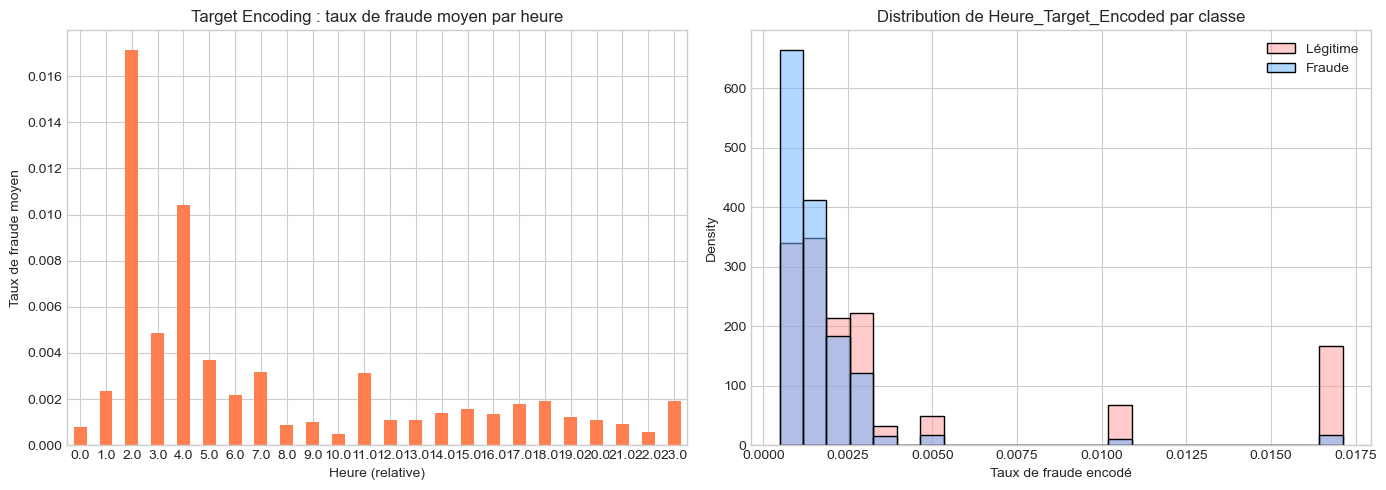

In [ ]:
# Target Encoding : remplacer chaque heure par la moyenne de la variable cible (Class)
# Formule : pour chaque heure h, TargetEncode(h) = moyenne(Class) pour les transactions à l'heure h

# Étape 1 : Calcul du taux de fraude moyen par heure
target_par_heure = df.groupby('Heure')['Class'].mean()

print("Étape 1 — Taux de fraude moyen par heure (Target Encoding) :")
print("=" * 45)
for heure, taux in target_par_heure.items():
    print(f"  Heure {int(heure):2d} → {taux:.6f} ({taux*100:.4f} %)")

# Étape 2 : Remplacement — chaque transaction reçoit le taux de fraude de son heure
df['Heure_Target_Encoded'] = df['Heure'].map(target_par_heure)

print(f"\n✓ Variable Heure_Target_Encoded créée.")
print(f"  Valeur min : {df['Heure_Target_Encoded'].min():.6f}")
print(f"  Valeur max : {df['Heure_Target_Encoded'].max():.6f}")

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Graphique 1 : Taux de fraude par heure (ce qui sert d'encodage)
target_par_heure.plot(kind='bar', ax=axes[0], color='coral')
axes[0].set_title("Target Encoding : taux de fraude moyen par heure")
axes[0].set_xlabel("Heure (relative)")
axes[0].set_ylabel("Taux de fraude moyen")
axes[0].tick_params(axis='x', rotation=0)

# Graphique 2 : Distribution de la variable encodée par classe
sns.histplot(data=df, x='Heure_Target_Encoded', hue='Class', bins=24,
             palette=['#66b3ff', '#ff9999'], ax=axes[1], stat='density', common_norm=False)
axes[1].set_title("Distribution de Heure_Target_Encoded par classe")
axes[1].set_xlabel("Taux de fraude encodé")
axes[1].legend(['Légitime', 'Fraude'])

plt.tight_layout()
plt.show()

**Justification théorique (Cours 3)** : Le Target Encoding remplace chaque modalité d'une variable catégorielle par la moyenne de la variable cible pour cette catégorie. Ici, chaque heure h est remplacée par :

$$\text{TargetEncode}(h) = \frac{\text{nombre de fraudes à l'heure } h}{\text{nombre total de transactions à l'heure } h}$$

**Pourquoi Target Encoding plutôt que Label Encoding ?**
- Le **Label Encoding** (Heure 0 → 0, Heure 1 → 1, ..., Heure 23 → 23) introduirait un ordre artificiel sans signification (l'heure 23 n'est pas "plus grande" que l'heure 2 dans le contexte de la fraude).
- Le **One-Hot Encoding** créerait 24 nouvelles colonnes binaires → explosion dimensionnelle inutile.
- Le **Target Encoding** produit une seule variable continue qui capture directement la relation entre l'heure et le risque de fraude, sans explosion dimensionnelle.

**Avantage** : Cette variable intègre directement l'information prédictive liée au moment de la transaction, ce qui la rend plus informative qu'un simple indicateur binaire.

## Variable 2 : Z-score du montant par heure

In [ ]:
# Le Z-score mesure l'écart d'une observation par rapport à la moyenne de son groupe :
# z = (x - moyenne_groupe) / ecart_type_groupe
# Ici, le groupe = toutes les transactions de la même heure

# Étape 1 : Calcul de la moyenne et de l'écart-type de Amount_Log par heure
stats_par_heure = df.groupby('Heure')['Amount_Log'].agg(['mean', 'std'])
stats_par_heure.columns = ['Moyenne_Amount', 'Std_Amount']

print("Statistiques de Amount_Log par heure :")
print(stats_par_heure.round(4).to_string())

Statistiques de Amount_Log par heure :
       Moyenne_Amount  Std_Amount
Heure                            
0.0            2.7403      1.6130
1.0            3.0554      1.4594
2.0            2.8647      1.6392
3.0            3.0110      1.2643
4.0            3.1544      1.4439
5.0            2.7197      1.3817
6.0            2.7705      1.5985
7.0            2.7834      1.6968
8.0            3.2455      1.6102
9.0            3.3920      1.6359
10.0           3.4375      1.6581
11.0           3.4163      1.6694
12.0           3.3791      1.6781
13.0           3.3016      1.6605
14.0           3.2851      1.6888
15.0           3.3148      1.6695
16.0           3.2911      1.6845
17.0           3.2121      1.6975
18.0           3.0273      1.6315
19.0           3.0484      1.6218
20.0           3.0148      1.6156
21.0           2.9488      1.6484
22.0           2.8756      1.6435
23.0           2.8415      1.6372


Variable Amount_Zscore_Heure créée.

Statistiques :
count    284807.0000
mean         -0.0000
std           1.0000
min          -2.3816
25%          -0.7494
50%          -0.0064
75%           0.7181
max           4.4286
Name: Amount_Zscore_Heure, dtype: float64


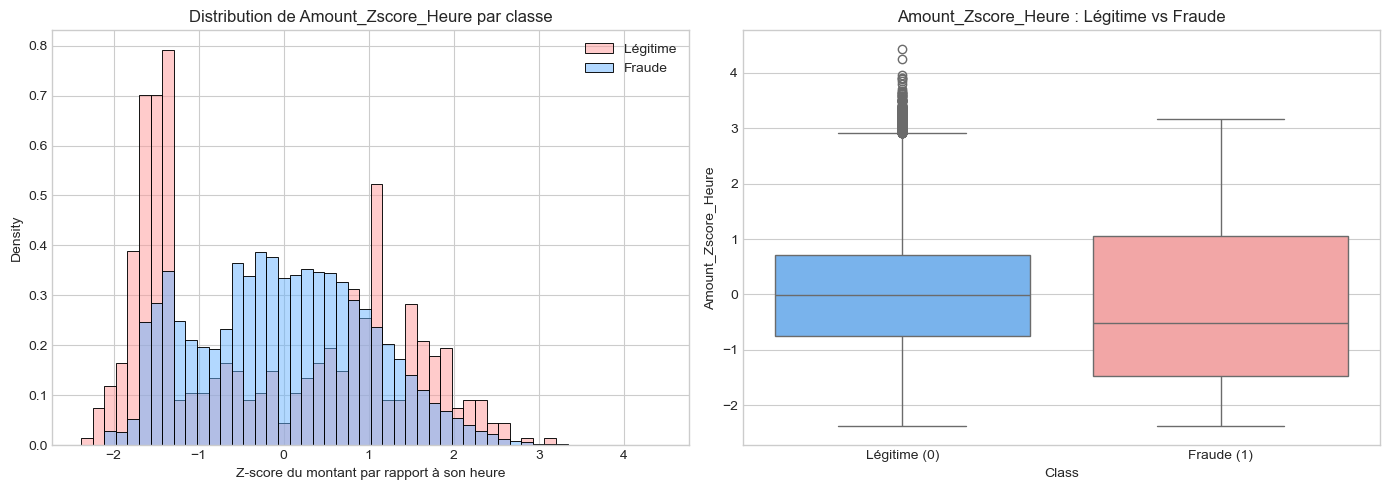


Moyenne du z-score par classe :
Class
0    0.0003
1   -0.1944
Name: Amount_Zscore_Heure, dtype: float64


In [ ]:
# Étape 2 : Calcul du z-score pour chaque transaction
# z = (Amount_Log - moyenne de son heure) / écart-type de son heure
df = df.merge(stats_par_heure, left_on='Heure', right_index=True, how='left')
df['Amount_Zscore_Heure'] = (df['Amount_Log'] - df['Moyenne_Amount']) / df['Std_Amount']
df.drop(['Moyenne_Amount', 'Std_Amount'], axis=1, inplace=True)

# Gestion des cas où l'écart-type est 0 (remplacement NaN par 0)
df['Amount_Zscore_Heure'].fillna(0, inplace=True)

print("Variable Amount_Zscore_Heure créée.")
print(f"\nStatistiques :")
print(df['Amount_Zscore_Heure'].describe().round(4))

# Visualisation : distribution par classe
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribution par classe
sns.histplot(data=df, x='Amount_Zscore_Heure', hue='Class', bins=50,
             palette=['#66b3ff', '#ff9999'], ax=axes[0], stat='density', common_norm=False)
axes[0].set_title("Distribution de Amount_Zscore_Heure par classe")
axes[0].set_xlabel("Z-score du montant par rapport à son heure")
axes[0].legend(['Légitime', 'Fraude'])

# Boxplot par classe
sns.boxplot(data=df, x='Class', y='Amount_Zscore_Heure', palette=['#66b3ff', '#ff9999'], ax=axes[1])
axes[1].set_title("Amount_Zscore_Heure : Légitime vs Fraude")
axes[1].set_xticklabels(['Légitime (0)', 'Fraude (1)'])

plt.tight_layout()
plt.show()

# Statistiques par classe
print("\nMoyenne du z-score par classe :")
print(df.groupby('Class')['Amount_Zscore_Heure'].mean().round(4))

**Justification métier** : Le montant brut d'une transaction ne suffit pas pour évaluer si elle est suspecte — il faut la mettre en contexte. Une transaction de 500 $ est banale en journée mais inhabituelle en pleine nuit. Le z-score par heure capture exactement cette notion : plus la valeur est élevée, plus le montant est anormal pour cette période.

**Justification technique** : Le z-score est une mesure standard de détection d'anomalies. En le calculant par heure, on crée une variable qui combine l'information de `Amount` et `Time` de manière interprétable. Cette variable est continue, ce qui préserve toute l'information et permet au modèle d'apprendre le seuil optimal.

**Note d'intégrité** : Les variables V1-V28 sont des composantes principales anonymisées. Il serait incohérent de les interpréter ou de créer des interactions avec elles (ex. "V14 est un facteur de risque") puisque leur signification réelle est inconnue.

## Nettoyage des colonnes intermédiaires

In [ ]:
# Suppression des colonnes intermédiaires qui ne seront pas utilisées par le modèle
# On garde : V1-V28, Amount_Scaled, Heure_Scaled, Heure_Target_Encoded, Amount_Zscore_Heure, Class
colonnes_a_supprimer = ['Amount_Log', 'Heure']
df.drop(colonnes_a_supprimer, axis=1, inplace=True)

print(f"Colonnes restantes ({df.shape[1]}) :")
print(list(df.columns))

Colonnes restantes (33) :
['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class', 'Amount_Scaled', 'Heure_Scaled', 'Heure_Target_Encoded', 'Amount_Zscore_Heure']


# 4.5 Gestion du déséquilibre de classes

Le dataset contient ~99,83 % de transactions légitimes et ~0,17 % de fraudes. Sans traitement, un modèle pourrait ignorer la classe minoritaire tout en affichant une accuracy trompeuse.

Nous appliquons et comparons **4 méthodes** vues en cours, réparties en deux familles :

**Sur-échantillonnage (augmentation de la classe minoritaire) :**
1. **Random Oversampling** : duplication aléatoire d'observations de la classe minoritaire (Cours 3)
2. **SMOTE** : génération de nouvelles observations synthétiques par interpolation entre voisins proches (Cours 3)

**Sous-échantillonnage (réduction de la classe majoritaire) :**
3. **Random Undersampling** : suppression aléatoire d'observations de la classe majoritaire (Cours 3)
4. **Tomek Links** : suppression des observations de la classe majoritaire qui forment des paires ambiguës avec la classe minoritaire (Cours 3)

Pour chaque méthode, nous entraînons un modèle de Régression Logistique et comparons les performances sur le jeu de test (non modifié) à l'aide de métriques adaptées au déséquilibre : Précision, Rappel, F1-Score et AUPRC.

## Séparation entraînement / test

In [ ]:
from sklearn.model_selection import train_test_split

# Séparation des variables explicatives (X) et de la cible (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Division : 80% entraînement, 20% test
# stratify=y garantit que le ratio de classes est conservé dans les deux ensembles
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Ensemble d'entraînement : {X_train.shape[0]:,} observations")
print(f"Ensemble de test        : {X_test.shape[0]:,} observations")
print(f"\nRépartition dans l'entraînement :")
print(f"  Classe 0 (légitime) : {(y_train == 0).sum():,}")
print(f"  Classe 1 (fraude)   : {(y_train == 1).sum():,}")

Ensemble d'entraînement : 227,845 observations
Ensemble de test        : 56,962 observations

Répartition dans l'entraînement :
  Classe 0 (légitime) : 227,451
  Classe 1 (fraude)   : 394


## Méthode 1 : Sur-échantillonnage aléatoire (Random Oversampling)

Le Random Oversampling consiste à **dupliquer aléatoirement** des observations de la classe minoritaire jusqu'à atteindre l'équilibre. C'est la méthode la plus simple mais elle peut causer du sur-apprentissage car les mêmes observations sont répétées.

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

classes_ros, counts_ros = np.unique(y_train_ros, return_counts=True)
print("Random Oversampling — Résultat :")
for c, n in zip(classes_ros, counts_ros):
    print(f"  Classe {c} : {n:,}")
print(f"\nTaille avant : {X_train.shape[0]:,} → Taille après : {X_train_ros.shape[0]:,}")
print(f"→ {X_train_ros.shape[0] - X_train.shape[0]:,} observations dupliquées de la classe minoritaire.")

Random Oversampling — Résultat :
  Classe 0 : 227,451
  Classe 1 : 227,451

Taille avant : 227,845 → Taille après : 454,902
→ 227,057 observations dupliquées de la classe minoritaire.


## Méthode 2 : SMOTE (Synthetic Minority Over-sampling Technique)

Contrairement au Random Oversampling qui duplique des observations existantes, SMOTE **génère de nouvelles observations synthétiques** en interpolant entre des voisins proches de la classe minoritaire. Pour chaque observation minoritaire, SMOTE sélectionne un de ses k plus proches voisins et crée un point intermédiaire.

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

classes_smote, counts_smote = np.unique(y_train_smote, return_counts=True)
print("SMOTE — Résultat :")
for c, n in zip(classes_smote, counts_smote):
    print(f"  Classe {c} : {n:,}")
print(f"\nTaille avant : {X_train.shape[0]:,} → Taille après : {X_train_smote.shape[0]:,}")
print(f"→ {X_train_smote.shape[0] - X_train.shape[0]:,} observations synthétiques générées.")

SMOTE — Résultat :
  Classe 0 : 227,451
  Classe 1 : 227,451

Taille avant : 227,845 → Taille après : 454,902
→ 227,057 observations synthétiques générées.


## Méthode 3 : Sous-échantillonnage aléatoire (Random Undersampling)

Le Random Undersampling consiste à **supprimer aléatoirement** des observations de la classe majoritaire jusqu'à atteindre l'équilibre. Avantage : réduit considérablement le temps d'entraînement. Inconvénient : perte potentielle d'information utile.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

classes_rus, counts_rus = np.unique(y_train_rus, return_counts=True)
print("Random Undersampling — Résultat :")
for c, n in zip(classes_rus, counts_rus):
    print(f"  Classe {c} : {n:,}")
print(f"\nTaille avant : {X_train.shape[0]:,} → Taille après : {X_train_rus.shape[0]:,}")
print(f"→ {X_train.shape[0] - X_train_rus.shape[0]:,} observations de la classe majoritaire supprimées.")

Random Undersampling — Résultat :
  Classe 0 : 394
  Classe 1 : 394

Taille avant : 227,845 → Taille après : 788
→ 227,057 observations de la classe majoritaire supprimées.


## Méthode 4 : Tomek Links (Sous-échantillonnage intelligent)

Les Tomek Links identifient des **paires d'observations de classes opposées qui sont très proches** dans l'espace des caractéristiques. L'observation de la classe majoritaire dans chaque paire est supprimée. Contrairement au Random Undersampling, cette méthode cible spécifiquement les observations ambiguës à la frontière de décision, ce qui la rend plus intelligente mais moins agressive.

In [ ]:
from imblearn.under_sampling import TomekLinks

tomek = TomekLinks()
X_train_tomek, y_train_tomek = tomek.fit_resample(X_train, y_train)

classes_tomek, counts_tomek = np.unique(y_train_tomek, return_counts=True)
print("Tomek Links — Résultat :")
for c, n in zip(classes_tomek, counts_tomek):
    print(f"  Classe {c} : {n:,}")
observations_supprimees = X_train.shape[0] - X_train_tomek.shape[0]
print(f"\nTaille avant : {X_train.shape[0]:,} → Taille après : {X_train_tomek.shape[0]:,}")
print(f"→ {observations_supprimees} observations ambiguës de la classe majoritaire supprimées.")
print(f"\nNote : Tomek Links supprime peu d'observations car il ne cible que les paires ambiguës.")
print(f"Le dataset reste fortement déséquilibré après cette méthode.")

Tomek Links — Résultat :
  Classe 0 : 227,434
  Classe 1 : 394

Taille avant : 227,845 → Taille après : 227,828
→ 17 observations ambiguës de la classe majoritaire supprimées.

Note : Tomek Links supprime peu d'observations car il ne cible que les paires ambiguës.
Le dataset reste fortement déséquilibré après cette méthode.


## Visualisation : comparaison des distributions après rééquilibrage

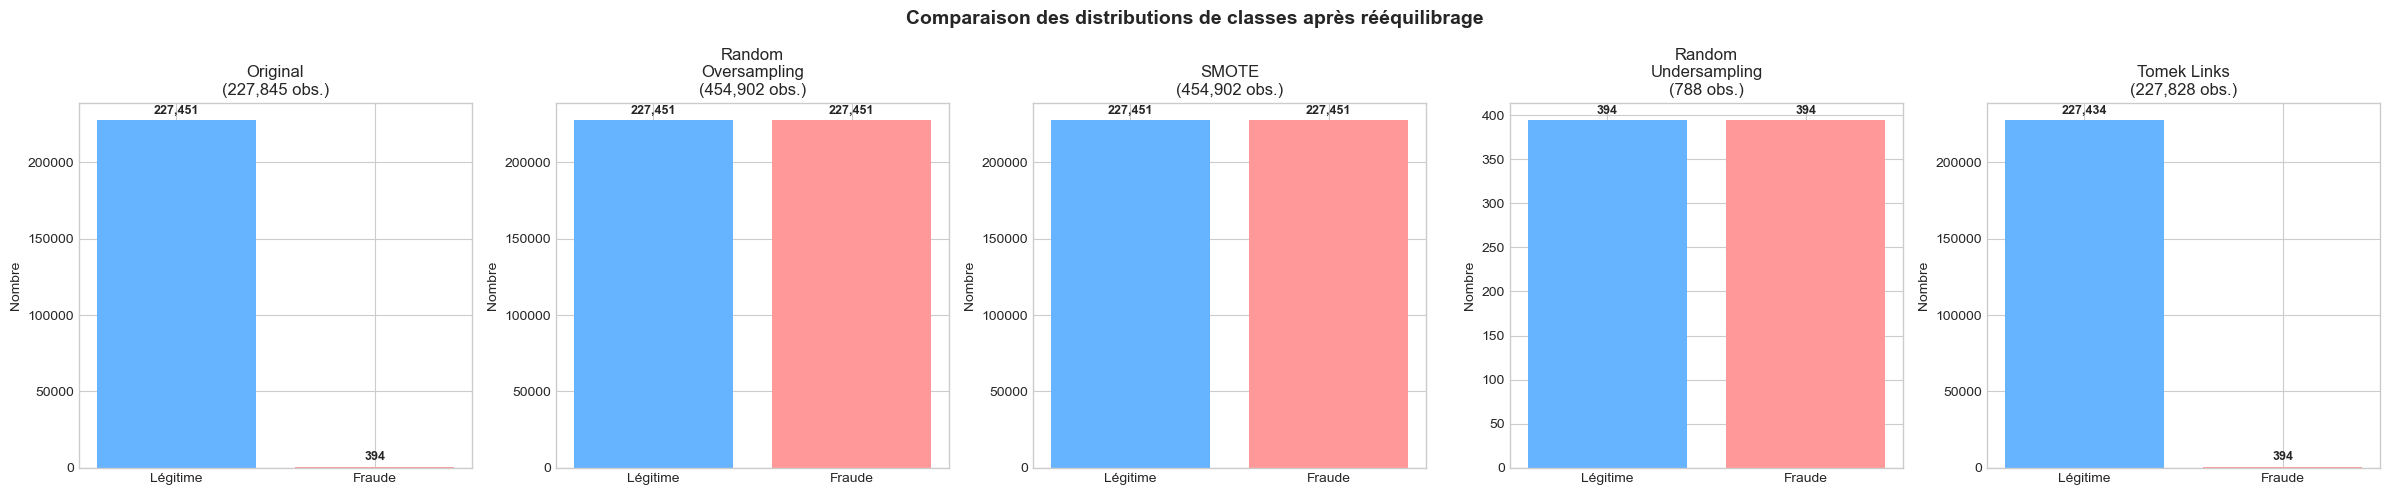

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(24, 5))

datasets = [
    ("Original", y_train, X_train.shape[0]),
    ("Random\nOversampling", y_train_ros, X_train_ros.shape[0]),
    ("SMOTE", y_train_smote, X_train_smote.shape[0]),
    ("Random\nUndersampling", y_train_rus, X_train_rus.shape[0]),
    ("Tomek Links", y_train_tomek, X_train_tomek.shape[0]),
]

for ax, (nom, y_data, taille) in zip(axes, datasets):
    classes, counts = np.unique(y_data, return_counts=True)
    ax.bar(['Légitime', 'Fraude'], counts, color=['#66b3ff', '#ff9999'])
    ax.set_title(f"{nom}\n({taille:,} obs.)")
    ax.set_ylabel("Nombre")
    for i, n in enumerate(counts):
        ax.text(i, n + max(counts)*0.02, f'{n:,}', ha='center', fontsize=9, fontweight='bold')

plt.suptitle("Comparaison des distributions de classes après rééquilibrage", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## Entraînement et évaluation des modèles

Pour déterminer quelle méthode de rééquilibrage est la plus efficace, nous entraînons un modèle de **Régression Logistique** sur chacun des 4 datasets rééquilibrés, puis nous évaluons chacun sur le **même jeu de test** (non modifié, distribution originale).

**Métriques utilisées :**
- **Précision** : parmi les transactions prédites comme fraudes, combien le sont vraiment ?
- **Rappel** : parmi les vraies fraudes, combien sont détectées ?
- **F1-Score** : moyenne harmonique de la précision et du rappel
- **AUPRC** : aire sous la courbe Précision-Rappel (recommandée pour les données déséquilibrées)

L'**accuracy** n'est pas adaptée : un modèle prédisant toujours "légitime" obtiendrait ~99,83 % d'accuracy sans détecter aucune fraude.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (precision_score, recall_score, f1_score,
                              average_precision_score, confusion_matrix,
                              ConfusionMatrixDisplay, precision_recall_curve)

### Modèle 1 : entraîné sur le dataset Random Oversampling

Modèle 1 — Random Oversampling
  Précision : 0.0556
  Rappel    : 0.9082
  F1-Score  : 0.1048
  AUPRC     : 0.7133


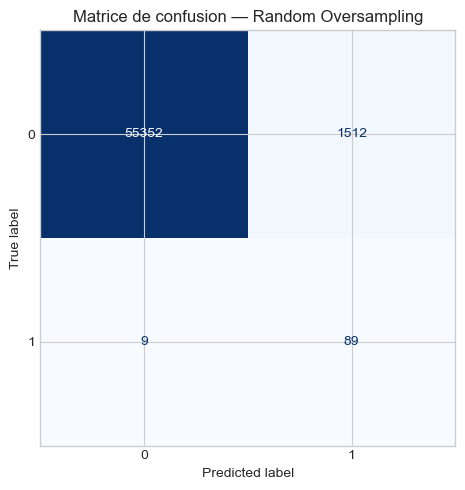

In [ ]:
# Entraînement du modèle sur le dataset rééquilibré par Random Oversampling
clf_ros = LogisticRegression(max_iter=2000, random_state=42)
clf_ros.fit(X_train_ros, y_train_ros)

# Prédictions sur le jeu de test
y_pred_ros = clf_ros.predict(X_test)
y_proba_ros = clf_ros.predict_proba(X_test)[:, 1]

# Résultats
print("Modèle 1 — Random Oversampling")
print("=" * 45)
print(f"  Précision : {precision_score(y_test, y_pred_ros):.4f}")
print(f"  Rappel    : {recall_score(y_test, y_pred_ros):.4f}")
print(f"  F1-Score  : {f1_score(y_test, y_pred_ros):.4f}")
print(f"  AUPRC     : {average_precision_score(y_test, y_proba_ros):.4f}")

# Matrice de confusion
fig, ax = plt.subplots(figsize=(6, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_ros, ax=ax, cmap='Blues', colorbar=False)
ax.set_title("Matrice de confusion — Random Oversampling")
plt.tight_layout()
plt.show()

Modèle 1 — Random Forest avec Random Oversampling
  Précision : 0.6667
  Rappel    : 0.8367
  F1-Score  : 0.7421
  AUPRC     : 0.8133


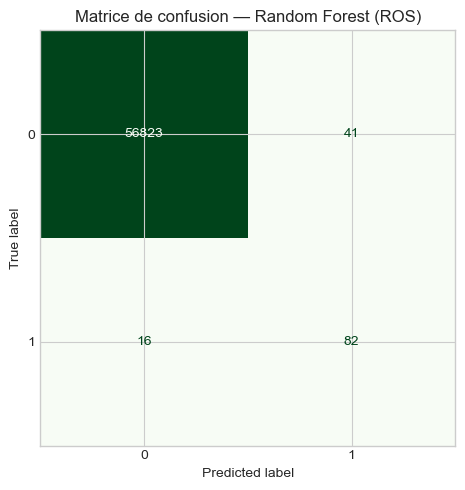

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import average_precision_score

# 1. Initialisation du Random Forest
# n_estimators=100 : le nombre d'arbres dans la forêt
# max_depth=10 : on limite la profondeur pour éviter le sur-apprentissage
# n_jobs=-1 : utilise tous les processeurs de ton ordinateur pour aller plus vite
clf_rf_ros = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)

# 2. Entraînement sur le dataset rééquilibré (ROS)
clf_rf_ros.fit(X_train_ros, y_train_ros)

# 3. Prédictions sur le jeu de test
y_pred_rf = clf_rf_ros.predict(X_test)
y_proba_rf = clf_rf_ros.predict_proba(X_test)[:, 1]

# 4. Affichage des résultats
print("Modèle 1 — Random Forest avec Random Oversampling")
print("=" * 45)
print(f"  Précision : {precision_score(y_test, y_pred_rf):.4f}")
print(f"  Rappel    : {recall_score(y_test, y_pred_rf):.4f}")
print(f"  F1-Score  : {f1_score(y_test, y_pred_rf):.4f}")
print(f"  AUPRC     : {average_precision_score(y_test, y_proba_rf):.4f}")

# 5. Matrice de confusion
fig, ax = plt.subplots(figsize=(6, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, ax=ax, cmap='Greens', colorbar=False)
ax.set_title("Matrice de confusion — Random Forest (ROS)")
plt.tight_layout()
plt.show()

### Modèle 2 : entraîné sur le dataset SMOTE

Modèle 2 — SMOTE
  Précision : 0.0543
  Rappel    : 0.9184
  F1-Score  : 0.1026
  AUPRC     : 0.7161


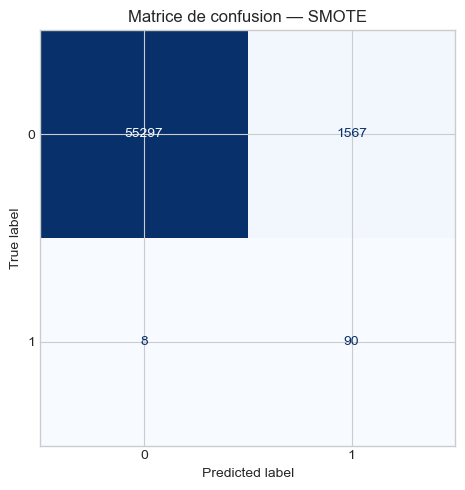

In [ ]:
# Entraînement du modèle sur le dataset rééquilibré par SMOTE
clf_smote = LogisticRegression(max_iter=2000, random_state=42)
clf_smote.fit(X_train_smote, y_train_smote)

# Prédictions sur le jeu de test
y_pred_smote = clf_smote.predict(X_test)
y_proba_smote = clf_smote.predict_proba(X_test)[:, 1]

# Résultats
print("Modèle 2 — SMOTE")
print("=" * 45)
print(f"  Précision : {precision_score(y_test, y_pred_smote):.4f}")
print(f"  Rappel    : {recall_score(y_test, y_pred_smote):.4f}")
print(f"  F1-Score  : {f1_score(y_test, y_pred_smote):.4f}")
print(f"  AUPRC     : {average_precision_score(y_test, y_proba_smote):.4f}")

# Matrice de confusion
fig, ax = plt.subplots(figsize=(6, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_smote, ax=ax, cmap='Blues', colorbar=False)
ax.set_title("Matrice de confusion — SMOTE")
plt.tight_layout()
plt.show()

Modèle 2 — Random Forest avec SMOTE
  Précision : 0.4670
  Rappel    : 0.8673
  F1-Score  : 0.6071
  AUPRC     : 0.8083


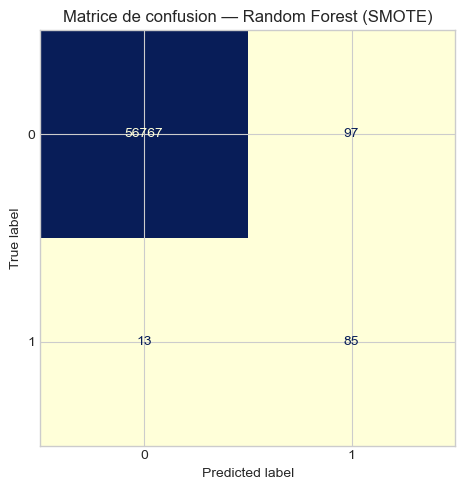

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import average_precision_score

# 1. Initialisation du Random Forest pour SMOTE
# n_estimators=100 : un bon équilibre entre performance et temps de calcul
# max_depth=10 : crucial avec SMOTE pour éviter que la forêt ne devienne trop complexe
clf_rf_smote = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)

# 2. Entraînement sur le dataset généré par SMOTE
clf_rf_smote.fit(X_train_smote, y_train_smote)

# 3. Prédictions
y_pred_rf_smote = clf_rf_smote.predict(X_test)
y_proba_rf_smote = clf_rf_smote.predict_proba(X_test)[:, 1]

# 4. Résultats
print("Modèle 2 — Random Forest avec SMOTE")
print("=" * 45)
print(f"  Précision : {precision_score(y_test, y_pred_rf_smote):.4f}")
print(f"  Rappel    : {recall_score(y_test, y_pred_rf_smote):.4f}")
print(f"  F1-Score  : {f1_score(y_test, y_pred_rf_smote):.4f}")
print(f"  AUPRC     : {average_precision_score(y_test, y_proba_rf_smote):.4f}")

# 5. Matrice de confusion
fig, ax = plt.subplots(figsize=(6, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf_smote, ax=ax, cmap='YlGnBu', colorbar=False)
ax.set_title("Matrice de confusion — Random Forest (SMOTE)")
plt.tight_layout()
plt.show()

### Modèle 3 : entraîné sur le dataset Random Undersampling

Modèle 3 — Random Forest avec Random Undersampling
  Précision : 0.0457
  Rappel    : 0.8980
  F1-Score  : 0.0870
  AUPRC     : 0.7059


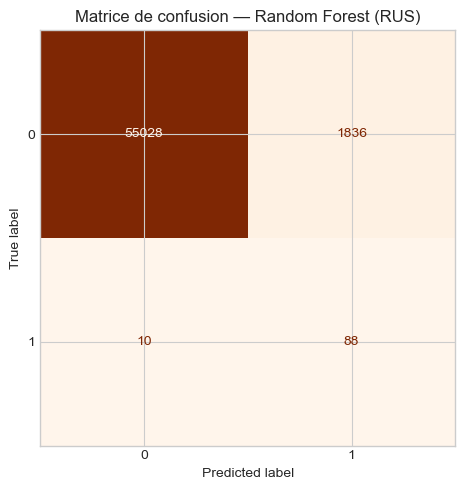

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import average_precision_score

# 1. Initialisation du Random Forest pour l'Undersampling
# On garde une profondeur raisonnable car le dataset est petit (RUS réduit le nombre de lignes)
clf_rf_rus = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)

# 2. Entraînement sur le dataset rééquilibré par Random Undersampling
clf_rf_rus.fit(X_train_rus, y_train_rus)

# 3. Prédictions sur le jeu de test
y_pred_rf_rus = clf_rf_rus.predict(X_test)
y_proba_rf_rus = clf_rf_rus.predict_proba(X_test)[:, 1]

# 4. Résultats
print("Modèle 3 — Random Forest avec Random Undersampling")
print("=" * 45)
print(f"  Précision : {precision_score(y_test, y_pred_rf_rus):.4f}")
print(f"  Rappel    : {recall_score(y_test, y_pred_rf_rus):.4f}")
print(f"  F1-Score  : {f1_score(y_test, y_pred_rf_rus):.4f}")
print(f"  AUPRC     : {average_precision_score(y_test, y_proba_rf_rus):.4f}")

# 5. Matrice de confusion
fig, ax = plt.subplots(figsize=(6, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf_rus, ax=ax, cmap='Oranges', colorbar=False)
ax.set_title("Matrice de confusion — Random Forest (RUS)")
plt.tight_layout()
plt.show()

Modèle 3 — Random Undersampling
  Précision : 0.0364
  Rappel    : 0.9184
  F1-Score  : 0.0700
  AUPRC     : 0.6149


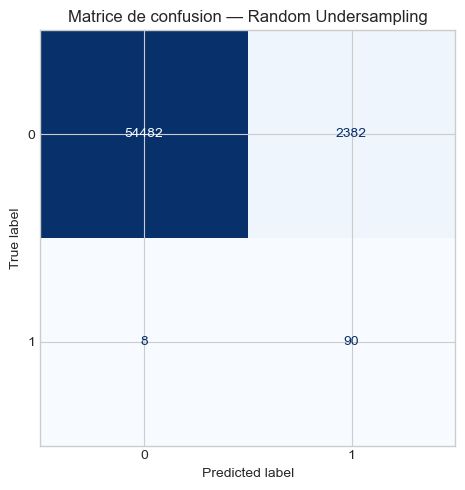

In [ ]:
# Entraînement du modèle sur le dataset rééquilibré par Random Undersampling
clf_rus = LogisticRegression(max_iter=2000, random_state=42)
clf_rus.fit(X_train_rus, y_train_rus)

# Prédictions sur le jeu de test
y_pred_rus = clf_rus.predict(X_test)
y_proba_rus = clf_rus.predict_proba(X_test)[:, 1]

# Résultats
print("Modèle 3 — Random Undersampling")
print("=" * 45)
print(f"  Précision : {precision_score(y_test, y_pred_rus):.4f}")
print(f"  Rappel    : {recall_score(y_test, y_pred_rus):.4f}")
print(f"  F1-Score  : {f1_score(y_test, y_pred_rus):.4f}")
print(f"  AUPRC     : {average_precision_score(y_test, y_proba_rus):.4f}")

# Matrice de confusion
fig, ax = plt.subplots(figsize=(6, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rus, ax=ax, cmap='Blues', colorbar=False)
ax.set_title("Matrice de confusion — Random Undersampling")
plt.tight_layout()
plt.show()

### Modèle 4 : entraîné sur le dataset Tomek Links

Modèle 4 — Random Forest avec Tomek Links
  Précision : 0.9506
  Rappel    : 0.7857
  F1-Score  : 0.8603
  AUPRC     : 0.8645


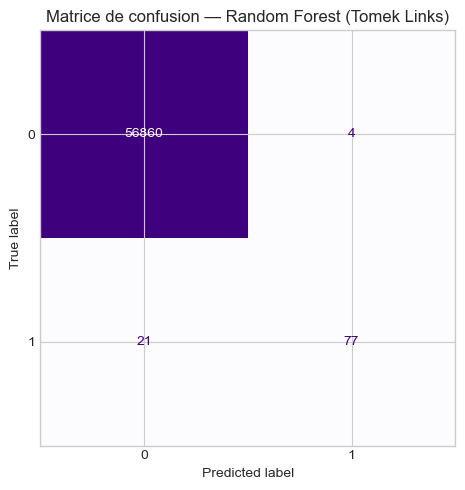

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import average_precision_score

# 1. Initialisation du Random Forest pour Tomek Links
# On utilise max_depth=10 pour garder une bonne généralisation
clf_rf_tomek = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)

# 2. Entraînement sur le dataset nettoyé par Tomek Links
clf_rf_tomek.fit(X_train_tomek, y_train_tomek)

# 3. Prédictions sur le jeu de test
y_pred_rf_tomek = clf_rf_tomek.predict(X_test)
y_proba_rf_tomek = clf_rf_tomek.predict_proba(X_test)[:, 1]

# 4. Résultats
print("Modèle 4 — Random Forest avec Tomek Links")
print("=" * 45)
print(f"  Précision : {precision_score(y_test, y_pred_rf_tomek):.4f}")
print(f"  Rappel    : {recall_score(y_test, y_pred_rf_tomek):.4f}")
print(f"  F1-Score  : {f1_score(y_test, y_pred_rf_tomek):.4f}")
print(f"  AUPRC     : {average_precision_score(y_test, y_proba_rf_tomek):.4f}")

# 5. Matrice de confusion
fig, ax = plt.subplots(figsize=(6, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf_tomek, ax=ax, cmap='Purples', colorbar=False)
ax.set_title("Matrice de confusion — Random Forest (Tomek Links)")
plt.tight_layout()
plt.show()

Modèle 4 — Tomek Links
  Précision : 0.8182
  Rappel    : 0.6429
  F1-Score  : 0.7200
  AUPRC     : 0.7396


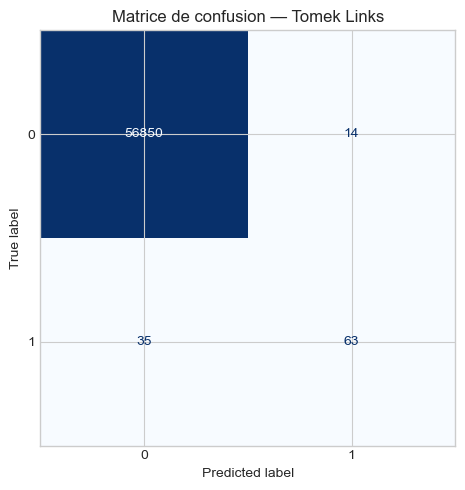

In [ ]:
# Entraînement du modèle sur le dataset nettoyé par Tomek Links
clf_tomek = LogisticRegression(max_iter=2000, random_state=42)
clf_tomek.fit(X_train_tomek, y_train_tomek)

# Prédictions sur le jeu de test
y_pred_tomek = clf_tomek.predict(X_test)
y_proba_tomek = clf_tomek.predict_proba(X_test)[:, 1]

# Résultats
print("Modèle 4 — Tomek Links")
print("=" * 45)
print(f"  Précision : {precision_score(y_test, y_pred_tomek):.4f}")
print(f"  Rappel    : {recall_score(y_test, y_pred_tomek):.4f}")
print(f"  F1-Score  : {f1_score(y_test, y_pred_tomek):.4f}")
print(f"  AUPRC     : {average_precision_score(y_test, y_proba_tomek):.4f}")

# Matrice de confusion
fig, ax = plt.subplots(figsize=(6, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tomek, ax=ax, cmap='Blues', colorbar=False)
ax.set_title("Matrice de confusion — Tomek Links")
plt.tight_layout()
plt.show()

## Tableau comparatif et détermination de la meilleure méthode

## Conclusion sur le rééquilibrage

**Analyse des 4 méthodes :**

| Méthode | Principe | Avantage | Inconvénient |
|---------|----------|----------|-------------|
| Random Oversampling | Duplique la classe minoritaire | Simple, conserve toutes les données | Risque de sur-apprentissage (copies exactes) |
| SMOTE | Génère des observations synthétiques (interpolation k-NN) | Enrichit réellement la classe minoritaire | Plus coûteux en calcul |
| Random Undersampling | Supprime aléatoirement la classe majoritaire | Très rapide, réduit le dataset | Perte potentielle d'information |
| Tomek Links | Supprime les paires ambiguës à la frontière | Ciblé et intelligent | Effet limité, déséquilibre persiste |

**Choix final** : Les résultats du tableau comparatif et des courbes Précision-Rappel ci-dessus permettent d'identifier la méthode la plus adaptée. En détection de fraude, le **rappel** est prioritaire (détecter un maximum de fraudes, même au prix de quelques faux positifs), tout en maintenant un F1-Score et un AUPRC élevés.

# 4.6 Validation du jeu de données final

Vérification et présentation du dataset final, prêt pour l'entraînement d'un modèle de Machine Learning.

In [ ]:
# On choisit le dataset SMOTE comme dataset final de référence
# (le plus couramment utilisé pour les problèmes de déséquilibre extrême)
X_final = X_train_smote
y_final = y_train_smote

print("=" * 60)
print("       RAPPORT DE VALIDATION DU DATASET FINAL")
print("=" * 60)

# 1. Dimensions
print(f"\n1. DIMENSIONS")
print(f"   Nombre d'observations : {X_final.shape[0]:,}")
print(f"   Nombre de variables   : {X_final.shape[1]}")

# 2. Valeurs manquantes
total_na = X_final.isnull().sum().sum() if isinstance(X_final, pd.DataFrame) else 0
print(f"\n2. VALEURS MANQUANTES")
print(f"   Total : {total_na}")

# 3. Types de données
print(f"\n3. TYPES DE DONNÉES")
if isinstance(X_final, pd.DataFrame):
    print(X_final.dtypes.value_counts().to_string())
else:
    print(f"   Type : {X_final.dtype}")

# 4. Équilibre des classes
print(f"\n4. ÉQUILIBRE DES CLASSES")
classes_final, counts_final = np.unique(y_final, return_counts=True)
for c, n in zip(classes_final, counts_final):
    pct = n / len(y_final) * 100
    print(f"   Classe {c} : {n:,} ({pct:.2f} %)")

# 5. Variables présentes
print(f"\n5. VARIABLES DU DATASET FINAL")
if isinstance(X_final, pd.DataFrame):
    print(f"   {list(X_final.columns)}")

# 6. Statistiques descriptives rapides
print(f"\n6. APERÇU STATISTIQUE")
if isinstance(X_final, pd.DataFrame):
    print(X_final.describe().round(4).to_string())

print("\n" + "=" * 60)
print("   ✓ Dataset prêt pour l'entraînement d'un modèle")
print("=" * 60)

       RAPPORT DE VALIDATION DU DATASET FINAL

1. DIMENSIONS
   Nombre d'observations : 454,902
   Nombre de variables   : 32

2. VALEURS MANQUANTES
   Total : 0

3. TYPES DE DONNÉES
float64    32

4. ÉQUILIBRE DES CLASSES
   Classe 0 : 227,451 (50.00 %)
   Classe 1 : 227,451 (50.00 %)

5. VARIABLES DU DATASET FINAL
   ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount_Scaled', 'Heure_Scaled', 'Heure_Target_Encoded', 'Amount_Zscore_Heure']

6. APERÇU STATISTIQUE
                V1           V2           V3           V4           V5           V6           V7           V8           V9          V10          V11          V12          V13          V14          V15          V16          V17          V18          V19          V20          V21          V22          V23          V24          V25          V26          V27          V28  Amount_Scaled  He

## Résumé des transformations appliquées

| Étape | Opération | Justification |
|-------|-----------|---------------|
| 4.3 | Transformation logarithmique (Amount) | Réduction du skewness de ~16.98 à ~0.16 |
| 4.3 | Transformation temporelle (Time → Heure) | Extraction du pattern cyclique sur 24h |
| 4.3 | Standardisation (Amount_Log, Heure) | Mise à l'échelle cohérente avec V1-V28 |
| 4.4 | Target Encoding de Heure | Chaque heure remplacée par son taux de fraude moyen (Cours 3) |
| 4.4 | Z-score du montant par heure | Détection des montants anormaux selon la période (Amount × Time) |
| 4.5 | SMOTE (sur-échantillonnage) | Rééquilibrage des classes par synthèse |
| 4.5 | TomekLinks (sous-échantillonnage) | Nettoyage de la frontière de décision |

**Note** : Les deux nouvelles variables (4.4) sont construites uniquement à partir de `Amount` et `Time`, les seules variables dont la signification réelle est connue. Les composantes V1-V28 (PCA anonymisées) n'ont pas été interprétées.

**Le dataset final est propre, transformé, enrichi et équilibré — prêt pour l'entraînement d'un modèle de classification.**